In [1]:
import glob
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Replay

In [3]:
results = "../nextflow/results/"

def gc_key(file):
    PR_str = file.split("/")[-2].split("-")
    return int(PR_str[1]), PR_str[3] + "-" + PR_str[2]

files = sorted(glob.glob(f"{results}/gctrees/PR*/gctree.p"), key=gc_key)
trees = {"_".join(f"{x}{y}" for x, y in zip(("mouse", "GC"), gc_key(file))): pickle.load(open(file, "rb"))
         for file in files}

print(f"loaded {len(trees)} GC trees")

loaded 0 GC trees


In [3]:
dat = []
for gc, tree in trees.items():
#     if gc.startswith("mouse7") or gc.startswith("mouse8"):
#         print(f"excluding 10-week mouse {gc}")
#     else:
        for node in tree.tree.traverse():
#             if node.abundance:
                dat.append([gc, node.name, len(node.mutations), ",".join(node.mutations), node.delta_bind_CGG_FVS_additive, node.delta_expr_FVS_additive, node.delta_psr_FVS_additive])
    
df = pd.DataFrame(dat, columns=("GC", "seq_id", "number of AA mutations", "mutations", "delta_bind", "delta_expr", "delta_psr"))
df

,GC,seq_id,number of AA mutations,mutations,delta_bind,delta_expr,delta_psr
0,mouse1_GC1-RP,naive,0,,0.00000,0.00000,0.00000
1,mouse1_GC1-RP,seq62,3,"Y103(H)F,S20(L)N,L116(L)P",-0.06082,0.14827,-0.13364
2,mouse1_GC1-RP,seq9,9,"E51(H)G,Y52(H)F,Y66(L)N,V71(L)I,D74(L)A,Q95(L)...",-3.45668,-1.05627,3.34321
3,mouse1_GC1-RP,seq76,1,Y58(H)D,-0.80796,-0.15104,-0.15010
4,mouse1_GC1-RP,1,4,"N40(H)H,N108(L)D,Y114(L)S,E125(L)Q",-7.71074,-0.77924,2.61806
...,...,...,...,...,...,...,...
7570,mouse12_GC130-LA,seq48,8,"S57(H)N,G63(H)D,A105(H)G,F115(H)L,V117(H)I,K9(...",0.76981,-0.35360,-0.43309
7571,mouse12_GC130-LA,seq43,6,"A105(H)G,F115(H)L,K9(L)E,Y55(L)*,N108(L)K,S109...",NaN,NaN,NaN
7572,mouse12_GC130-LA,seq40,6,"D81(H)A,A105(H)G,F115(H)L,K9(L)E,N108(L)K,S109...",1.21465,-0.30891,-0.18378
7573,mouse12_GC130-LA,seq6,7,"N48(H)S,A105(H)G,F115(H)L,K9(L)E,N108(L)K,S109...",0.93495,0.03260,-0.33309


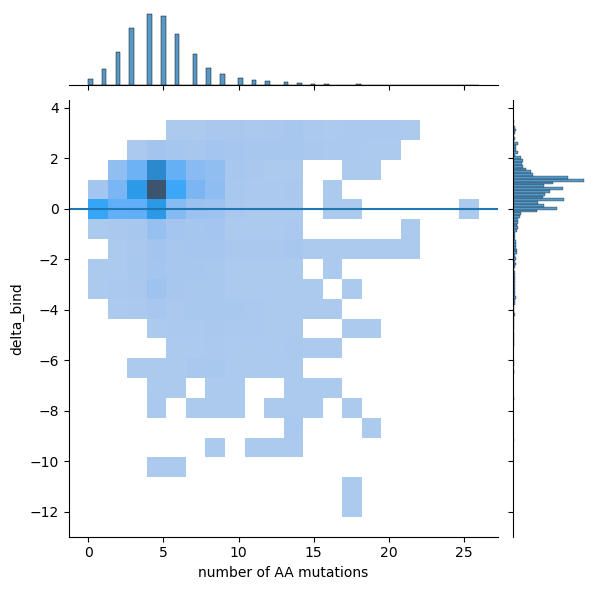

In [4]:
g = sns.jointplot(data=df, x="number of AA mutations", y="delta_bind", kind="hist", joint_kws=dict(bins=20))
g.ax_joint.axhline(0)
plt.show()

## DMS

In [5]:
dms_df = pd.read_csv("https://media.githubusercontent.com/media/jbloomlab/Ab-CGGnaive_DMS/main/results/final_variant_scores/final_variant_scores.csv", index_col="mutation", dtype=dict(position_IMGT=pd.Int16Dtype()))
# remove linker sites
dms_df = dms_df[dms_df.chain != "link"]
# add indicator for wildtype data
dms_df["WT"] = dms_df.wildtype == dms_df.mutant
assert dms_df.position_IMGT.max() < 1000
dms_df["site"] = [f"{chain}-{str(pos).zfill(3)}" for chain, pos in zip(dms_df.chain, dms_df.position_IMGT)]
dms_df

,target,wildtype,position,position_IMGT,chain,annotation,mutant,codon,single_nt,bind_CGG,...,expr,delta_expr,n_bc_expr,n_libs_expr,psr,delta_psr,n_bc_psr,n_libs_psr,WT,site
mutation,,,,,,,,,,,,,,,,,,,,,
E1(H)A,CGG_naive,E,1,1,H,FWRH1,A,GAG,True,10.48829,...,10.44614,-0.00453,19.0,2.0,6.78608,-0.07452,17.0,2.0,False,H-001
E1(H)C,CGG_naive,E,1,1,H,FWRH1,C,GAG,False,10.44477,...,10.32364,-0.12703,20.0,2.0,7.44234,0.58174,17.0,2.0,False,H-001
E1(H)D,CGG_naive,E,1,1,H,FWRH1,D,GAG,True,10.42771,...,10.51618,0.06551,16.0,2.0,6.95940,0.09880,13.0,2.0,False,H-001
E1(H)E,CGG_naive,E,1,1,H,FWRH1,E,GAG,True,10.45719,...,10.45067,0.00000,21170.0,2.0,6.86060,0.00000,18910.0,2.0,True,H-001
E1(H)F,CGG_naive,E,1,1,H,FWRH1,F,GAG,False,10.51899,...,10.33163,-0.11904,24.0,2.0,6.91372,0.05313,21.0,2.0,False,H-001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R128(L)S,CGG_naive,R,235,128,L,FWRL4,S,CGT,True,10.44756,...,10.54313,0.09246,39.0,2.0,6.93925,0.07866,33.0,2.0,False,L-128
R128(L)T,CGG_naive,R,235,128,L,FWRL4,T,CGT,False,10.43023,...,10.53860,0.08793,36.0,2.0,6.88956,0.02896,34.0,2.0,False,L-128
R128(L)V,CGG_naive,R,235,128,L,FWRL4,V,CGT,False,10.38231,...,10.48707,0.03640,27.0,2.0,6.78160,-0.07899,24.0,2.0,False,L-128


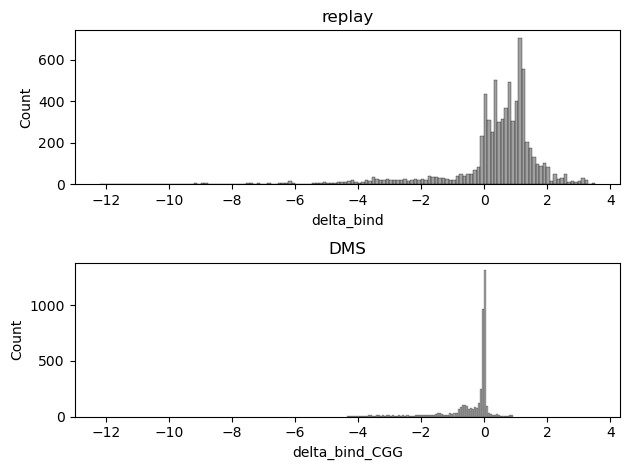

In [6]:
plt.subplot(211)
ax = sns.histplot(data=df, x="delta_bind", color="grey")
plt.title("replay")
plt.subplot(212, sharex=ax)
sns.histplot(data=dms_df, x="delta_bind_CGG", color="grey")
plt.title("DMS")
plt.tight_layout()
plt.show()

In [7]:
quantiles = df["delta_bind"].quantile(np.linspace(0, 1, 30))
quantiles

0.000000   -12.195310
0.034483    -3.537800
0.068966    -2.162976
0.103448    -1.129635
0.137931    -0.378331
0.172414    -0.069427
0.206897     0.000000
0.241379     0.065435
0.275862     0.162050
0.310345     0.279054
0.344828     0.331000
0.379310     0.379591
0.413793     0.502168
0.448276     0.564194
0.482759     0.673490
0.517241     0.746230
0.551724     0.813197
0.586207     0.864090
0.620690     0.957280
0.655172     1.043951
0.689655     1.091740
0.724138     1.148652
0.758621     1.186660
0.793103     1.206461
0.827586     1.251841
0.862069     1.370201
0.896552     1.526026
0.931034     1.798492
0.965517     2.196657
1.000000     3.517890
Name: delta_bind, dtype: float64

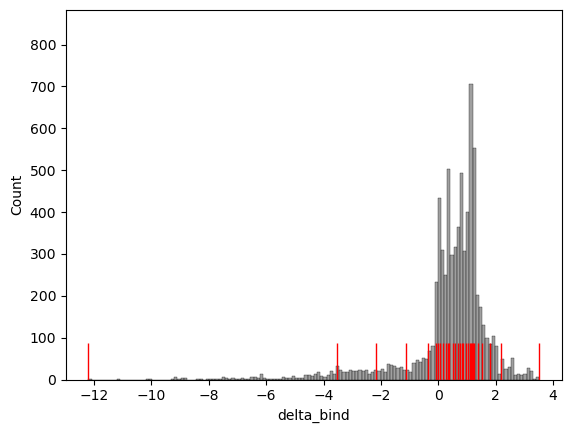

In [8]:
sns.histplot(data=df, x="delta_bind", color="grey")
sns.rugplot(x=quantiles, height=0.1, color="red")
plt.show()

In [9]:
idxs = []

for q in quantiles:
    closest = np.inf
    for i in range(len(df)):
        delta = abs(df.loc[i, "delta_bind"] - q)
        if delta < closest:
            closest = delta
            closest_i = i
    idxs.append(closest_i)

df.loc[idxs]

,GC,seq_id,number of AA mutations,mutations,delta_bind,delta_expr,delta_psr
6001,mouse8_GC87-LI,seq9,18,"I30(H)V,T35(H)S,F45(H)I,L50(H)F,Y52(H)F,M53(H)...",-12.19531,-0.69039,2.17393
1470,mouse2_GC21-RP,seq74,4,"N40(H)K,D107(H)E,Y68(L)F,E101(L)D",-3.53833,0.00743,1.65048
7269,mouse12_GC127-RB,seq28,8,"G27(H)D,M53(H)L,G63(H)D,Y87(H)F,T96(H)P,N38(L)...",-2.15926,-0.20613,0.16264
2463,mouse2_GC34-LB,seq42,6,"K49(H)E,Y102(H)F,A105(H)T,Y42(L)F,Q43(L)H,A52(L)T",-1.12943,-0.59992,0.30541
1402,mouse1_GC6-LP,seq67,6,"T96(H)S,Y103(H)F,K9(L)R,N28(L)I,Y42(L)H,L116(L)P",-0.37899,-0.66445,-0.43649
4789,mouse5_GC78-LP,seq65,7,"Y58(H)N,S64(H)N,Y87(H)H,Y102(H)F,A105(H)G,E101...",-0.06962,-0.34447,0.39163
0,mouse1_GC1-RP,naive,0,,0.00000,0.00000,0.00000
6361,mouse11_GC113-LP,seq3,7,"M53(H)L,S59(H)T,G63(H)N,A105(H)G,N28(L)S,D74(L...",0.06552,-0.30568,-0.09525
3237,mouse3_GC55-RB,10,3,"I76(H)F,Y103(H)F,Y42(L)N",0.16205,-1.20693,0.50580
7363,mouse12_GC128-LB,8,4,"T65(H)P,G36(L)R,Q105(L)H,L116(L)V",0.27889,-0.15038,-0.04654


## Tatsuya's designs

final design choices

In [10]:
df_designed = pd.read_csv("220331.2_Variants_to_produce.csv")
df_designed.Category = df_designed.Category.str.split(":").str[0].str.replace('"', "").str.replace("mouse 1", "").str.replace("mouse 2", "")
df_designed

,Fab #,Category,PR,HK_key_mouse,HK_key_node,HK_key_gc,HK_key_cell_type,name,parent_name,abundance,...,IgK_nt_sequence,IgK_aa_sequence,delta_bind,delta_expr,delta_psr,LC_prefix_twist,LC_insert_twist,HC_prefix_twist,HC_suffix_twist,HC_insert_twist
0,1,Uniform ladder,PR1.6,8.0,LI,87.0,GC,seq46,51,1.0,...,GACATTGTGATGACTCAGTCTCAAGAATTCATGTCCACGTCAGTAG...,DIVMTQSQEFMSTSVGDRVSVTCKASQNVGTDVAWYQQKPGQSPKA...,-12.19531,-0.69039,2.17393,GTACATTCC,GTACATTCCGACATTGTGATGACTCAGTCTCAAGAATTCATGTCCA...,GTACATTCC,GC,GTACATTCCGAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGA...
1,2,Uniform ladder,PR1.5,8.0,LP,85.0,GC,seq36,11,2.0,...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWFQQKPGHSPKA...,-9.15380,-0.97991,2.38985,GTACATTCC,GTACATTCCGACATTGTGATGACTCAGTCTCAAAAATTCATGTCCA...,GTACATTCC,GC,GTACATTCCGAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGA...
2,3,Uniform ladder,PR1.7,2.0,RB,28.0,GC,seq35,18,1.0,...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKA...,-7.52469,-0.55500,0.84990,GTACATTCC,GTACATTCCGACATTGTGATGACTCAGTCTCAAAAATTCATGTCCA...,GTACATTCC,GC,GTACATTCCGAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGA...
3,4,Uniform ladder,PR1.5,8.0,RI,86.0,GC,seq6,seq35,1.0,...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVETNVAWFQQKPGQSPKA...,-5.32024,-0.73088,2.19250,GTACATTCC,GTACATTCCGACATTGTGATGACTCAGTCTCAAAAATTCATGTCCA...,GTACATTCC,GC,GTACATTCCGAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGA...
4,5,Uniform ladder,PR1.2,4.0,LI,73.0,GC,seq32,26,1.0,...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWNQQKPGQSPKA...,-3.07380,-1.33981,0.57563,GTACATTCC,GTACATTCCGACATTGTGATGACTCAGTCTCAAAAATTCATGTCCA...,GTACATTCC,GC,GTACATTCCGAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGA...
5,6,Uniform ladder,PR1.3,3.0,LP,46.0,GC,seq51,seq23,1.0,...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGINVAWYQQKPGQSPKA...,-1.41357,-1.84166,0.87274,GTACATTCC,GTACATTCCGACATTGTGATGACTCAGTCTCAAAAATTCATGTCCA...,GTACATTCC,GC,GTACATTCCGAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGA...
6,7,Uniform ladder,PR1.7,1.0,RB,12.0,GC,seq21,3,1.0,...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKA...,1.50696,0.11229,0.16275,GTACATTCC,GTACATTCCGACATTGTGATGACTCAGTCTCAAAAATTCATGTCCA...,GTACATTCC,GC,GTACATTCCGAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGA...
7,8,Uniform ladder,PR1.6,8.0,RP,84.0,GC,seq62,seq40,1.0,...,GACATTGTAATGACTCAGTCTCAAAAATTCATGTCCACATCAGAAG...,DIVMTQSQKFMSTSEGDRVSVTCKASQDVGTNVAWYQEKPGQSPKA...,2.19166,-0.08753,0.72645,GTACATTCC,GTACATTCCGACATTGTAATGACTCAGTCTCAAAAATTCATGTCCA...,GTACATTCC,GC,GTACATTCCGAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGA...
8,9,Uniform ladder,PR1.5,8.0,LB,89.0,GC,seq67,40,1.0,...,GACATTGTGATGACTCAGTCTCAAAAACTCATGTCCACATCAGTAG...,DIVMTQSQKLMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKA...,2.70218,0.05960,-0.10394,GTACATTCC,GTACATTCCGACATTGTGATGACTCAGTCTCAAAAACTCATGTCCA...,GTACATTCC,GC,GTACATTCCGAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGA...
9,10,Uniform ladder,PR1.5,8.0,RI,86.0,GC,18,53,0.0,...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGCAG...,DIVMTQSQKFMSTSAGDRVSVTCKASQNVGTNVGWYQQKPGQSPKA...,3.51789,0.28299,-0.06213,GTACATTCC,GTACATTCCGACATTGTGATGACTCAGTCTCAAAAATTCATGTCCA...,GTACATTCC,GC,GTACATTCCGAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGA...


Note: High potential are missing phenotype info

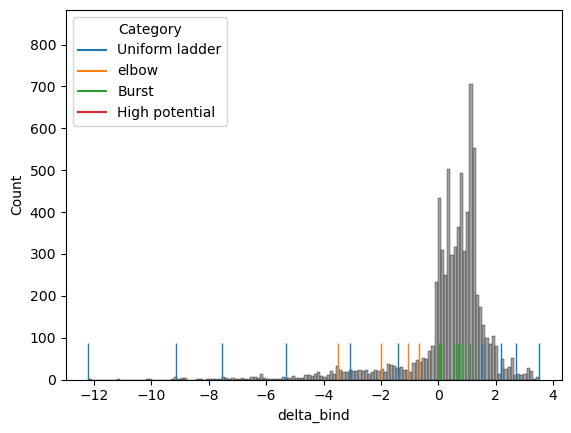

In [11]:
sns.histplot(data=df, x="delta_bind", color="grey")
sns.rugplot(data=df_designed, x="delta_bind", hue="Category", height=0.1, lw=2)
plt.show()

## Revisiting ladder

Ashni's octet Fabs

In [12]:
fab_df = pd.read_csv("OctetFabs.csv", index_col="Fab #")
fab_df

,Category,HC vector,LC vector,delta_bind,delta_expr,delta_psr,IgH_mutations,IgK_mutations
Fab #,,,,,,,,
1,Uniform ladder,Replay-1H,Replay-1K,-12.19531,-0.69039,2.17393,"I30(H)V,T35(H)S,F45(H)I,L50(H)F,Y52(H)F,M53(H)...","K9(L)E,N38(L)D,Y68(L)F,Y110(L)F,K119(L)D"
2,Uniform ladder,Replay-2H,Replay-2K,-9.15380,-0.97991,2.38985,"V25(H)A,N40(H)H,K49(H)R,E51(H)D,N92(H)S,A105(H)T","Y42(L)F,Q48(L)H,S92(L)T,E101(L)D,S109(L)N,Y110..."
3,Uniform ladder,Replay-3H,Replay-3K,-7.52469,-0.55500,0.84990,"N40(H)H,Q86(H)H","S92(L)R,Y110(L)D"
4,Uniform ladder,Replay-4H,Replay-4K,-5.32024,-0.73088,2.19250,"T35(H)I,N40(H)I,K49(H)G,S57(H)N,N85(H)G,Y87(H)...","G36(L)E,Y42(L)F,Y66(L)S,S69(L)N,Q105(L)H"
5,Uniform ladder,Replay-5H,Replay-5K,-3.07380,-1.33981,0.57563,"I56(H)M,S64(H)N,D107(H)E","Y42(L)N,Y55(L)S,S92(L)N"
6,Uniform ladder,Replay-6H,Replay-6K,-1.41357,-1.84166,0.87274,"S57(H)N,Y102(H)H,T115(H)S","T37(L)I,L112(L)P"
7,Uniform ladder,Replay-7H,Replay-7K,1.50696,0.11229,0.16275,"D28(H)A,T35(H)A,N40(H)S,Y67(H)F,S74(H)G","Y66(L)H,F103(L)I,N108(L)K"
8,Uniform ladder,Replay-8H,Replay-8K,2.19166,-0.08753,0.72645,"D28(H)G,S57(H)N,S64(H)G,A105(H)G,V110(H)F","V15(L)E,N28(L)D,Q44(L)E,Q105(L)H,N108(L)K"
9,Uniform ladder,Replay-9H,Replay-9K,2.70218,0.05960,-0.10394,"D28(H)V,S59(H)T,I76(H)F,Q86(H)H,A105(H)G","F10(L)L,Q105(L)H,N108(L)K,S109(L)I,L112(L)I,E1..."


Take only the ladder

In [13]:
fab_df.query("Category == 'Uniform ladder'", inplace=True)
fab_df

,Category,HC vector,LC vector,delta_bind,delta_expr,delta_psr,IgH_mutations,IgK_mutations
Fab #,,,,,,,,
1,Uniform ladder,Replay-1H,Replay-1K,-12.19531,-0.69039,2.17393,"I30(H)V,T35(H)S,F45(H)I,L50(H)F,Y52(H)F,M53(H)...","K9(L)E,N38(L)D,Y68(L)F,Y110(L)F,K119(L)D"
2,Uniform ladder,Replay-2H,Replay-2K,-9.15380,-0.97991,2.38985,"V25(H)A,N40(H)H,K49(H)R,E51(H)D,N92(H)S,A105(H)T","Y42(L)F,Q48(L)H,S92(L)T,E101(L)D,S109(L)N,Y110..."
3,Uniform ladder,Replay-3H,Replay-3K,-7.52469,-0.55500,0.84990,"N40(H)H,Q86(H)H","S92(L)R,Y110(L)D"
4,Uniform ladder,Replay-4H,Replay-4K,-5.32024,-0.73088,2.19250,"T35(H)I,N40(H)I,K49(H)G,S57(H)N,N85(H)G,Y87(H)...","G36(L)E,Y42(L)F,Y66(L)S,S69(L)N,Q105(L)H"
5,Uniform ladder,Replay-5H,Replay-5K,-3.07380,-1.33981,0.57563,"I56(H)M,S64(H)N,D107(H)E","Y42(L)N,Y55(L)S,S92(L)N"
6,Uniform ladder,Replay-6H,Replay-6K,-1.41357,-1.84166,0.87274,"S57(H)N,Y102(H)H,T115(H)S","T37(L)I,L112(L)P"
7,Uniform ladder,Replay-7H,Replay-7K,1.50696,0.11229,0.16275,"D28(H)A,T35(H)A,N40(H)S,Y67(H)F,S74(H)G","Y66(L)H,F103(L)I,N108(L)K"
8,Uniform ladder,Replay-8H,Replay-8K,2.19166,-0.08753,0.72645,"D28(H)G,S57(H)N,S64(H)G,A105(H)G,V110(H)F","V15(L)E,N28(L)D,Q44(L)E,Q105(L)H,N108(L)K"
9,Uniform ladder,Replay-9H,Replay-9K,2.70218,0.05960,-0.10394,"D28(H)V,S59(H)T,I76(H)F,Q86(H)H,A105(H)G","F10(L)L,Q105(L)H,N108(L)K,S109(L)I,L112(L)I,E1..."


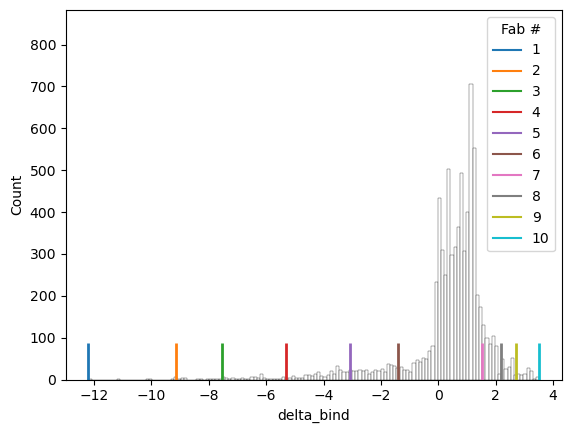

In [14]:
sns.histplot(data=df, x="delta_bind", color="white")
sns.rugplot(data=fab_df, x="delta_bind", hue=fab_df.index.astype(str), height=0.1, linewidth=2)
plt.show()

Let's add some points

In [15]:
new_ladder_points = np.linspace(fab_df.delta_bind.values[5], fab_df.delta_bind.values[6], 5)[1:-1]
new_ladder_points = np.concatenate(([(fab_df.delta_bind.values[4] + fab_df.delta_bind.values[5]) / 2],
                                    new_ladder_points,
                                    [(fab_df.delta_bind.values[8] + fab_df.delta_bind.values[9]) / 2]))
new_ladder_points
new_ladder_fab_numbers = np.array(["5.1", "6.1", "6.2", "6.3", "9.1"])

In [16]:
# idxs = []
# for x in ladder:
#     closest = np.inf
#     for i in range(len(df)):
#         delta = abs(df.loc[i, "delta_bind"] - x)
#         if delta < closest:
#             closest = delta
#             closest_i = i
#     idxs.append(closest_i)

# ladder_df = df.loc[idxs]
# ladder_df["design"] = "previous ladder"

for x, fab_id in zip(new_ladder_points, new_ladder_fab_numbers):
    closest = np.inf
    closest_i = None
    for i in range(len(df)):
        delta = abs(df.loc[i, "delta_bind"] - x)
        IgH_mutations = [mutation for mutation in df.loc[i, "mutations"].split(",") if "(H)" in mutation]
        IgK_mutations = [mutation for mutation in df.loc[i, "mutations"].split(",") if "(L)" in mutation]
        if delta < closest and (2 <= len(IgH_mutations) + len(IgK_mutations) <= 8):
            closest = delta
            closest_i = i
            closest_IgH_mutations = IgH_mutations
            closest_IgK_mutations = IgK_mutations
    fab_df.loc[fab_id, "Category"] = "Proposed ladder additions"
    fab_df.loc[fab_id, "delta_bind"] = df.loc[closest_i, "delta_bind"]
    fab_df.loc[fab_id, "delta_expr"] = df.loc[closest_i, "delta_expr"]
    fab_df.loc[fab_id, "delta_psr"] = df.loc[closest_i, "delta_psr"]
    fab_df.loc[fab_id, "IgH_mutations"] = ",".join(closest_IgH_mutations)
    fab_df.loc[fab_id, "IgK_mutations"] = ",".join(closest_IgK_mutations)

fab_df.sort_values("delta_bind", inplace=True)
fab_df

,Category,HC vector,LC vector,delta_bind,delta_expr,delta_psr,IgH_mutations,IgK_mutations
Fab #,,,,,,,,
1,Uniform ladder,Replay-1H,Replay-1K,-12.19531,-0.69039,2.17393,"I30(H)V,T35(H)S,F45(H)I,L50(H)F,Y52(H)F,M53(H)...","K9(L)E,N38(L)D,Y68(L)F,Y110(L)F,K119(L)D"
2,Uniform ladder,Replay-2H,Replay-2K,-9.15380,-0.97991,2.38985,"V25(H)A,N40(H)H,K49(H)R,E51(H)D,N92(H)S,A105(H)T","Y42(L)F,Q48(L)H,S92(L)T,E101(L)D,S109(L)N,Y110..."
3,Uniform ladder,Replay-3H,Replay-3K,-7.52469,-0.55500,0.84990,"N40(H)H,Q86(H)H","S92(L)R,Y110(L)D"
4,Uniform ladder,Replay-4H,Replay-4K,-5.32024,-0.73088,2.19250,"T35(H)I,N40(H)I,K49(H)G,S57(H)N,N85(H)G,Y87(H)...","G36(L)E,Y42(L)F,Y66(L)S,S69(L)N,Q105(L)H"
5,Uniform ladder,Replay-5H,Replay-5K,-3.07380,-1.33981,0.57563,"I56(H)M,S64(H)N,D107(H)E","Y42(L)N,Y55(L)S,S92(L)N"
5.1,Proposed ladder additions,NaN,NaN,-2.24133,-0.49794,4.05727,"L50(H)F,S64(H)R,T65(H)N,Y67(H)D,A105(H)G","E101(L)D,Y114(L)H"
6,Uniform ladder,Replay-6H,Replay-6K,-1.41357,-1.84166,0.87274,"S57(H)N,Y102(H)H,T115(H)S","T37(L)I,L112(L)P"
6.1,Proposed ladder additions,NaN,NaN,-0.68410,-0.71206,-0.42709,S57(H)N,"E97(L)D,Q106(L)H,L116(L)P"
6.2,Proposed ladder additions,NaN,NaN,0.04666,-0.04320,0.34699,"S11(H)G,I76(H)V,Y87(H)H,A105(H)G",N108(L)K


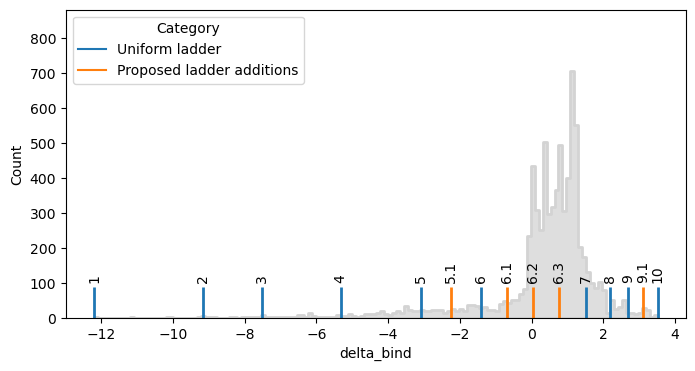

In [17]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x="delta_bind", color="lightgrey", element="step", lw=2)
ax = sns.rugplot(data=fab_df, x="delta_bind", hue="Category", height=0.1, linewidth=2)
sns.move_legend(ax, "upper left")
for fab in fab_df.index:
    plt.annotate(fab, (fab_df.loc[fab, "delta_bind"], 100), horizontalalignment="center", verticalalignment="bottom", rotation=90)
plt.savefig("output/octet_designs/ladder.pdf")
plt.show()

In [18]:
fab_df.to_csv("output/octet_designs/ladder_update.csv")